# Fifa18 Complete Player Data Analysis

### Table of Contents:

### Fifa18 Complete Player Data Analysis

In [1074]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [1075]:
#read the data
df = pd.read_csv("/Users/ashishpowani/Downloads/FIfa_Data_Analysis/fifa-18-demo-player-dataset/CompleteDataset.csv", low_memory=False)

In [1076]:
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1077]:
df.shape

(17981, 75)

In [1078]:
df.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [1079]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

### Data Preprocessing

In [1080]:
# Drop the column 'Unnamed: 0' [Not required]
df = df.drop(['Unnamed: 0'], axis=1)

In [1081]:
# Function to remove characters 'K', 'M' and '€' from the data
def remove_char_from(value):
    out = value.replace('€','')
    if 'K' in out:
        out = float(out.replace('K',''))*1000
    elif 'M' in out:
        out = float(out.replace('M',''))*1000000
    return float(out)

In [1082]:
# Remove the characters from wage and value columns and convert them to numeric column
df['Wage'] = [remove_char_from(x) for x in df.Wage]
df['Value'] = [remove_char_from(x) for x in df.Value]

In [1083]:
df.dtypes
df.head(10)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,92000000.0,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,64500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,90500000.0,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,79000000.0,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,77000000.0,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


###### Subset from the main dataframe (Selecting only required columns)

In [1084]:
subset_df = df[['Name', 'Age', 'Nationality', 'Overall', 'Wage', 'Potential', 'Club', 'Value', 'Preferred Positions']]

In [1085]:
subset_df.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK


###### Data Cleaning

In [1086]:
# Finding null value columns
subset_df.isnull().sum()

Name                     0
Age                      0
Nationality              0
Overall                  0
Wage                     0
Potential                0
Club                   248
Value                    0
Preferred Positions      0
dtype: int64

In [1087]:
#Remove null value rows/players
subset_df = subset_df.dropna()
subset_df.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK


###### Feature Engineering

In [1088]:
subset_df['Growth'] = subset_df['Potential'] - subset_df['Overall']

In [1089]:
subset_df.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW,0
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW,0
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW,2
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST,0
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK,0


### 1) How does the avg. overall ratings, avg. growth ratings and avg. potential ratings trend for all ages?  


In [1090]:
subset_df.Age.unique()

array([32, 30, 25, 31, 28, 26, 27, 29, 39, 23, 24, 35, 33, 34, 36, 21, 22,
       18, 20, 19, 37, 38, 40, 17, 44, 41, 16, 43, 47])

In [1189]:
age = subset_df.sort_values("Age")['Age'].unique()
fifa_growth = subset_df.groupby(['Age'])['Growth'].mean()
fifa_potential = subset_df.groupby(['Age'])['Potential'].mean()
fifa_overall = subset_df.groupby(['Age'])['Overall'].mean()

frames = [fifa_growth, fifa_potential, fifa_Overall]
summary_result = pd.concat(frames,axis=1)

In [1186]:
summary_result.head(10)

,Growth,Potential,Overall
Age,,,
16,18.692308,76.538462,57.846154
17,17.403101,73.492248,56.089147
18,15.367560,72.654762,57.287202
19,13.386492,72.806754,59.420263
20,11.156578,72.719935,61.563358
21,9.399844,72.805947,63.406103
22,7.774562,72.555217,64.780655
23,6.379461,72.504734,66.125273
24,4.910809,72.113379,67.202570


###### Plotting the Average Growth, average Potential and average overall ratings by Age

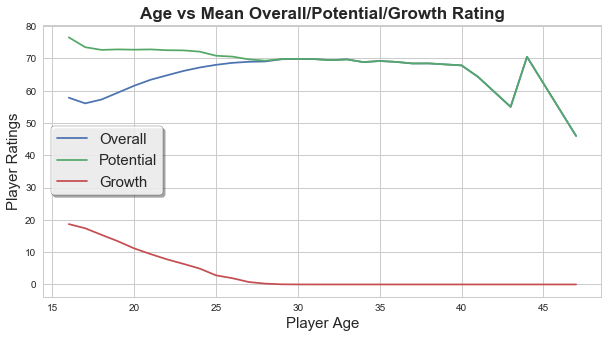

In [1241]:
plt.figure()
plt.figure(figsize=(10,5))
plt.title('Age vs Mean Overall/Potential/Growth Rating', fontsize=17, fontweight='bold')
plt.xlabel('Player Age', fontsize=15)
plt.ylabel('Player Ratings', fontsize=15)
sns.set_style("whitegrid")
plt.plot(age, fifa_overall, label="Overall")
plt.plot(age, fifa_potential, label="Potential")
plt.plot(age, fifa_growth, label="Growth")
plt.legend(loc=6, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

###### Inference: 

### 2)  Frequency Distribution of players on their overall rating

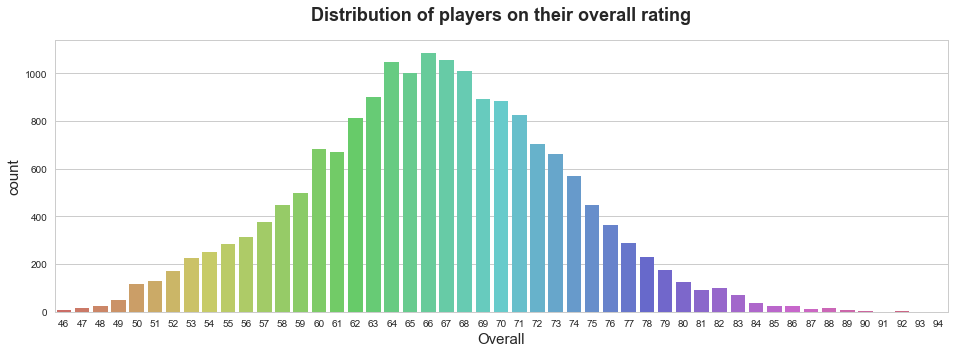

In [1173]:
plt.figure(figsize=(16,5))
sns.set_style("whitegrid")
plt.title('Distribution of players on their overall rating', fontsize=18, fontweight='bold', y=1.05,)
plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
sns.countplot(x="Overall", data=subset_df, palette="hls");
plt.show()

###### Inference

### 3) Clubs with most players having an overall rating more than 85

In [1095]:
cutoff=85
few_players = subset_df[subset_df['Overall']>cutoff]

In [1096]:
few_players.head()

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW,0
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW,0
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW,2
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST,0
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK,0


In [1097]:
No_of_players_in_each_club = few_players.groupby(['Club'])['Overall'].count()
No_of_players_in_each_club_sorted = No_of_players_in_each_club.sort_values(ascending=False)

In [1098]:
No_of_players_in_each_club_sorted

Club
FC Bayern Munich       12
Real Madrid CF          8
Chelsea                 6
FC Barcelona            6
Juventus                5
Manchester United       4
Tottenham Hotspur       4
Paris Saint-Germain     4
Manchester City         3
Borussia Dortmund       3
Atlético Madrid         3
Arsenal                 3
Inter                   2
Napoli                  2
Liverpool               1
Roma                    1
Milan                   1
Beşiktaş JK             1
Name: Overall, dtype: int64

###### Plot the data

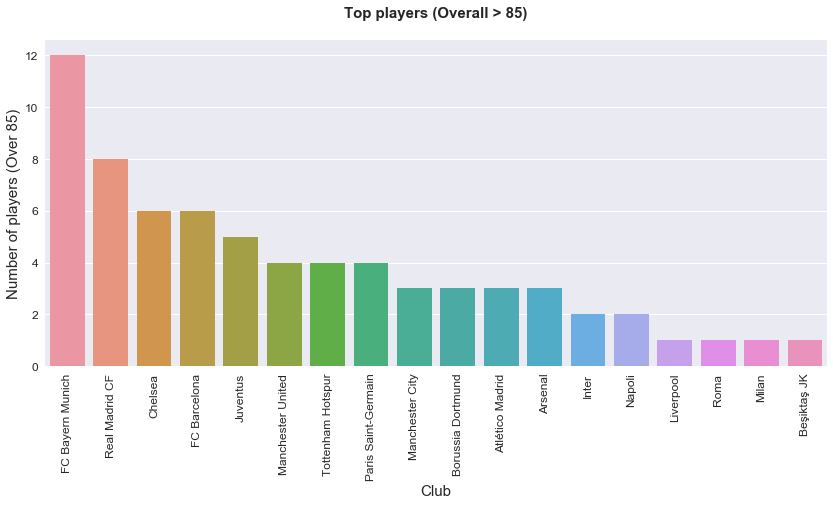

In [1249]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x = 'Club', data = few_players, order = No_of_players_in_each_club_sorted.index)

ax.set_xticklabels(labels = No_of_players_in_each_club_sorted.index, rotation='vertical')
ax.set_ylabel('Number of players (Over 85)',fontsize=15)
ax.set_xlabel('Club',fontsize=15)
ax.tick_params(labelsize=12)
ax.set_title('Top players (Overall > %.i)' %cutoff,fontsize=15,fontweight='bold', y=1.05,)
plt.show()

###### Inference

### 4) a ) Does overall ratings have an influence on wage and value of the player?

In [1100]:
subset_df.Overall.unique()

array([94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

In [1101]:
Wage_Overall = subset_df.groupby(['Overall'])['Wage'].mean()
Value_Overall = subset_df.groupby(['Overall'])['Value'].mean()

In [1102]:
Wage_Overall = Wage_Overall.apply(lambda x: x/1000)
Value_Overall = Value_Overall.apply(lambda x: x/1000000)

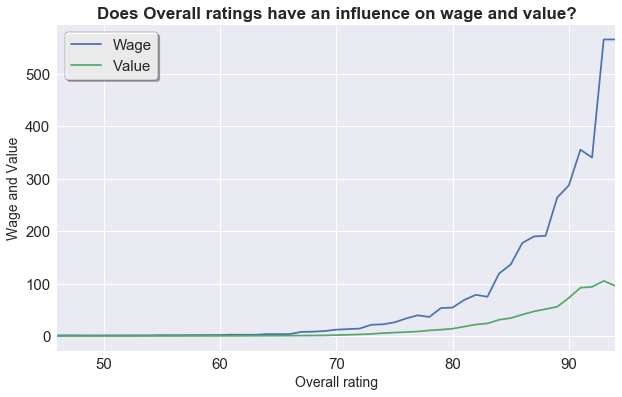

In [1281]:
plt.figure(figsize=(10,6))
Wage_Overall.plot(legend=True,fontsize=15)
Value_Overall.plot(legend=True)
plt.title("Does Overall ratings have an influence on wage and value?",fontsize=17,fontweight='bold')
plt.xlabel("Overall rating", fontsize=14)
plt.ylabel("Wage and Value", fontsize=14)
plt.legend(loc=2, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

###### Inference

### 4) b) Does Potential ratings have an influence on wage and value of the player?

In [1105]:
Wage_Potential = subset_df.groupby(['Potential'])['Wage'].mean()
Value_Potential = subset_df.groupby(['Potential'])['Value'].mean()

In [1106]:
Wage_Potential = Wage_Potential.apply(lambda x: x/1000)
Value_Potential = Value_Potential.apply(lambda x: x/1000000)

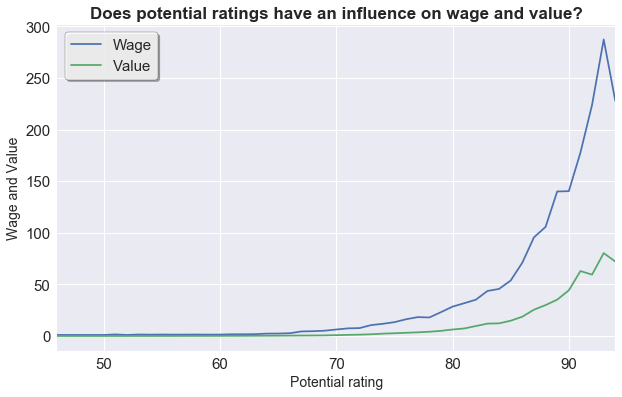

In [1280]:
plt.figure(figsize=(10,6))
Wage_Potential.plot(legend=True,fontsize=15)
Value_Potential.plot(legend=True)
plt.title("Does potential ratings have an influence on wage and value?",fontsize=17,fontweight='bold')
plt.xlabel("Potential rating", fontsize=14)
plt.ylabel("Wage and Value", fontsize=14)
plt.legend(loc=2, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

###### Inference

### 5) Determining the average age of players in each club

In [1268]:
Avg_Age_in_each_club = subset_df.groupby(['Club'])['Age'].mean()

In [1271]:
Avg_Age_in_each_club = Avg_Age_in_each_club.rename_axis(('Club')).reset_index(name='Mean_Age_in_Each_club').sort_values('Mean_Age_in_Each_club')

In [1272]:
Avg_Age_in_each_club.head(10).reset_index(drop=True)

,Club,Mean_Age_in_Each_club
0,Sevilla Atlético,19.793103
1,FC Barcelona B,20.379310
2,Werder Bremen II,21.400000
3,LOSC Lille,21.629630
4,Crewe Alexandra,21.884615
5,FC Nordsjælland,22.000000
6,Galway United,22.040000
7,Ajax,22.068966
8,Barnsley,22.100000
9,PSV,22.115385


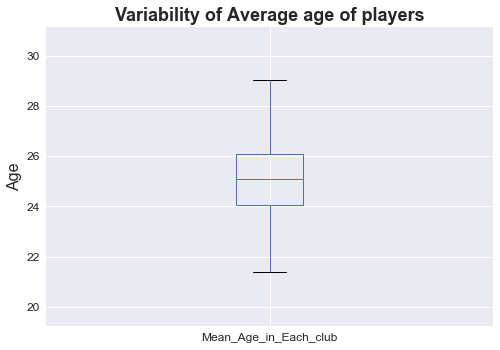

In [1273]:
plt.figure(figsize=(10,6))
Avg_Age_in_each_club.plot.box()
plt.title('Variability of Average age of players', fontsize=18, fontweight='bold')
plt.tick_params(labelsize=12)
plt.ylabel('Age', fontsize=16)
plt.show()

### 6) View stats of your favorite club [FC Barcelona]

In [1112]:
subset_df['Club'].head()

0         Real Madrid CF
1           FC Barcelona
2    Paris Saint-Germain
3           FC Barcelona
4       FC Bayern Munich
Name: Club, dtype: object

In [1113]:
ManU_Players = subset_df[subset_df['Club']=="FC Barcelona"]

In [1126]:
ManU_Players.sort_values('Wage',ascending=False).head(10).reset_index(drop=True)

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth,Wage(by Potential),Value(by Potential)
0,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW,0,565000.0,105000000.0
1,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST,0,510000.0,97000000.0
2,I. Rakitić,29,Croatia,87,275000.0,87,FC Barcelona,48500000.0,CM,0,275000.0,48500000.0
3,Iniesta,33,Spain,87,260000.0,87,FC Barcelona,29500000.0,LM CM,0,260000.0,29500000.0
4,Sergio Busquets,28,Spain,86,250000.0,86,FC Barcelona,36000000.0,CM CDM,0,250000.0,36000000.0
5,Piqué,30,Spain,87,240000.0,87,FC Barcelona,37500000.0,CB,0,240000.0,37500000.0
6,Jordi Alba,28,Spain,85,215000.0,85,FC Barcelona,30500000.0,LB,0,215000.0,30500000.0
7,A. Turan,30,Turkey,82,170000.0,82,FC Barcelona,20500000.0,LW RW CM,0,170000.0,20500000.0
8,Paulinho,28,Brazil,81,165000.0,81,FC Barcelona,17500000.0,CDM CM,0,165000.0,17500000.0
9,Deulofeu,23,Spain,82,165000.0,89,FC Barcelona,31000000.0,RW LW,7,165000.0,31000000.0


### 7) Teams that have highest expenditures in terms of wages to players

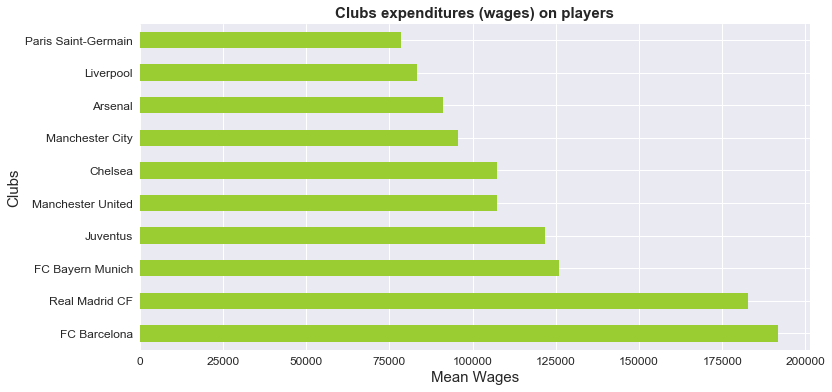

In [1277]:
plt.figure(figsize=(12,6))
subset_df.groupby(['Club'])['Wage'].mean().sort_values(ascending=False).head(10).plot(kind='barh',color=['yellowgreen'])
plt.title("Clubs expenditures (wages) on players",fontsize=15,fontweight='bold')
plt.xlabel("Mean Wages",fontsize=15)
plt.tick_params(labelsize=12)
plt.ylabel("Clubs",fontsize=15)
plt.show()

###### Inference

FC Barcelona pays the most(190,000) in terms of meang wages to the players amongst all the clubs which is then followed by Read Madrid CF. However in the above analysis, we see that Messi and Suarez are paid very high wages which skews the mean wages for this club.

### 8) Players that get the highest wages

In [1122]:
Highest_wages = subset_df.sort_values('Wage',ascending=False).head(15)

In [1125]:
Highest_wages[['Name','Club','Wage','Value','Overall','Potential','Preferred Positions']].reset_index(drop=True)

,Name,Club,Wage,Value,Overall,Potential,Preferred Positions
0,Cristiano Ronaldo,Real Madrid CF,565000.0,95500000.0,94,94,ST LW
1,L. Messi,FC Barcelona,565000.0,105000000.0,93,93,RW
2,L. Suárez,FC Barcelona,510000.0,97000000.0,92,92,ST
3,G. Bale,Real Madrid CF,370000.0,69500000.0,89,89,RW
4,R. Lewandowski,FC Bayern Munich,355000.0,92000000.0,91,91,ST
5,L. Modrić,Real Madrid CF,340000.0,57000000.0,89,89,CDM CM
6,T. Kroos,Real Madrid CF,340000.0,79000000.0,90,90,CDM CM
7,S. Agüero,Manchester City,325000.0,66500000.0,89,89,ST
8,Sergio Ramos,Real Madrid CF,310000.0,52000000.0,90,90,CB
9,K. Benzema,Real Madrid CF,295000.0,44500000.0,86,86,ST


###### Inference

The top 10 players have their overall rating same as their potential ratings which means they have reached their maximum potential rating. 

### 9) Countries that have the most number of players

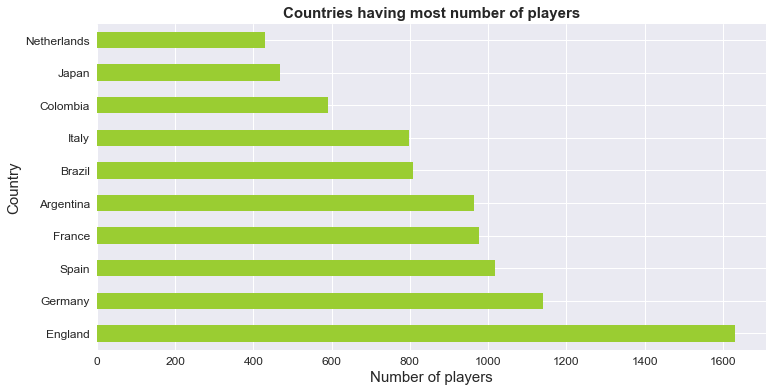

In [1278]:
plt.figure(figsize=(12,6))
subset_df.groupby(['Nationality']).Name.count().sort_values(ascending=False).head(10).plot(kind="barh",color='yellowgreen')
plt.title("Countries having most number of players",fontsize=15,fontweight='bold')
plt.xlabel("Number of players",fontsize=15)
plt.tick_params(labelsize=12)
plt.ylabel("Country",fontsize=15)
plt.show()

### 10) Most Powerful teams

###### Most Powerful teams based on overall rating

In [1130]:
subset_df.groupby(['Club'])['Overall'].mean().sort_values(ascending=False).head(15)

Club
FC Barcelona           82.560000
Juventus               81.653846
Real Madrid CF         81.038462
FC Bayern Munich       79.423077
Paris Saint-Germain    77.964286
Manchester United      77.705882
Napoli                 77.653846
Roma                   77.370370
Sevilla FC             76.961538
Inter                  76.720000
Chelsea                76.666667
Sporting CP            76.281250
FC Porto               76.096774
Atlético Madrid        75.875000
Liverpool              75.875000
Name: Overall, dtype: float64

###### Most Powerful teams based on Potential rating

In [1131]:
subset_df.groupby(['Club'])['Potential'].mean().sort_values(ascending=False).head(15)

Club
Real Madrid CF         85.961538
FC Barcelona           85.560000
FC Bayern Munich       84.500000
Juventus               84.038462
Paris Saint-Germain    83.357143
Manchester United      83.235294
Chelsea                82.606061
Manchester City        82.363636
Liverpool              82.031250
Atlético Madrid        81.968750
Napoli                 81.961538
Borussia Dortmund      81.705882
Arsenal                81.636364
Tottenham Hotspur      81.562500
Milan                  81.275862
Name: Potential, dtype: float64

### 11) Top players based on Overall Rating

In [1138]:
subset_df.sort_values('Overall',ascending=False).head(10)

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth,Wage(by Potential),Value(by Potential)
0,Cristiano Ronaldo,32,Portugal,94,565000.0,94,Real Madrid CF,95500000.0,ST LW,0,565000.0,95500000.0
1,L. Messi,30,Argentina,93,565000.0,93,FC Barcelona,105000000.0,RW,0,565000.0,105000000.0
2,Neymar,25,Brazil,92,280000.0,94,Paris Saint-Germain,123000000.0,LW,2,280000.0,123000000.0
3,L. Suárez,30,Uruguay,92,510000.0,92,FC Barcelona,97000000.0,ST,0,510000.0,97000000.0
4,M. Neuer,31,Germany,92,230000.0,92,FC Bayern Munich,61000000.0,GK,0,230000.0,61000000.0
5,R. Lewandowski,28,Poland,91,355000.0,91,FC Bayern Munich,92000000.0,ST,0,355000.0,92000000.0
6,De Gea,26,Spain,90,215000.0,92,Manchester United,64500000.0,GK,2,215000.0,64500000.0
7,E. Hazard,26,Belgium,90,295000.0,91,Chelsea,90500000.0,LW,1,295000.0,90500000.0
8,T. Kroos,27,Germany,90,340000.0,90,Real Madrid CF,79000000.0,CDM CM,0,340000.0,79000000.0
9,G. Higuaín,29,Argentina,90,275000.0,90,Juventus,77000000.0,ST,0,275000.0,77000000.0


### 12) Does Age have influence in Overall Rating?

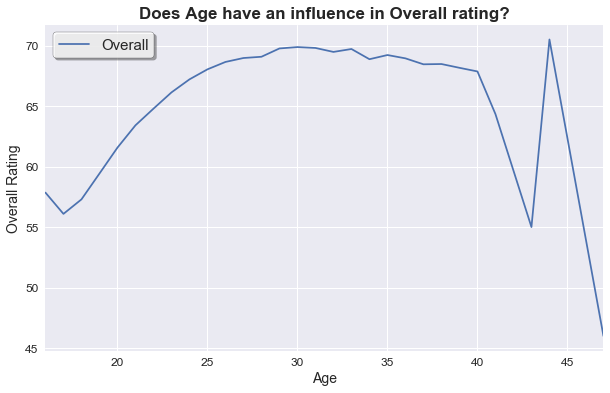

In [1283]:
plt.figure(figsize=(10,6))
subset_df.groupby(['Age'])['Overall'].mean().plot(title="Age vs Overall Ratings", legend=True)
plt.title("Does Age have an influence in Overall rating?",fontsize=17,fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Overall Rating", fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(loc=2, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [1137]:
# Let us see the spike in the overall rating after the age of 40 [Outliers]
subset_df[subset_df['Age']>40].reset_index(drop=True)

,Name,Age,Nationality,Overall,Wage,Potential,Club,Value,Preferred Positions,Growth,Wage(by Potential),Value(by Potential)
0,O. Pérez,44,Mexico,71,9000.0,71,Pachuca,160000.0,GK,0,9000.0,160000.0
1,E. El Hadary,44,Egypt,70,7000.0,70,Al Taawoun,120000.0,GK,0,7000.0,120000.0
2,Quim,41,Portugal,69,3000.0,69,CD Aves,70000.0,GK,0,3000.0,70000.0
3,K. Wæhler,41,Norway,67,2000.0,67,Sogndal,0.0,CB,0,2000.0,0.0
4,C. Day,41,England,57,1000.0,57,Stevenage,10000.0,GK,0,1000.0,10000.0
5,D. Coyne,43,Wales,55,1000.0,55,Shrewsbury,10000.0,GK,0,1000.0,10000.0
6,J. Walker,43,England,55,1000.0,55,Lincoln City,10000.0,GK,0,1000.0,10000.0
7,B. Richardson,47,England,46,1000.0,46,Wycombe Wanderers,0.0,GK,0,1000.0,0.0


###### Inference

Although few players who are aged more than 40 have fairly good rating, their Wage is very less compared to the players with the same overall rating

### 13) Does Age have influence in Growth rating or the potential to grow as a better player?

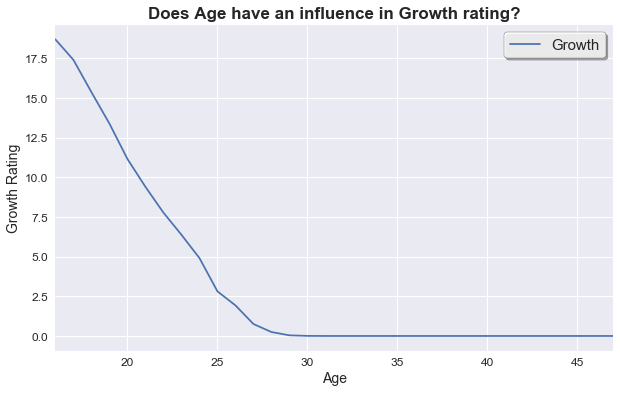

In [1285]:
plt.figure(figsize=(10,6))
subset_df.groupby(['Age'])['Growth'].mean().plot(title="Age vs Growth Rating", legend=True)
plt.title("Does Age have an influence in Growth rating?",fontsize=17,fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Growth Rating", fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

##### Inference

Younger players from 17 to 28 have high growth ratings

### 14) Distribution of preferred positions

In [874]:
df_preferred_pos = subset_df['Preferred Positions'].str.split(' ',expand=False)

In [875]:
df_preferred_pos.values

array([['ST', 'LW', ''], ['RW', ''], ['LW', ''], ..., ['ST', ''],
       ['CM', ''], ['ST', 'CB', '']], dtype=object)

In [876]:
pp_list =[]
for x in df_preferred_pos:
    pp_list.extend(x)

In [878]:
df_pp = pd.DataFrame({'Preferred_Position':pp_list})

In [1038]:
df_pp['Preferred_Position'].replace('', np.nan, inplace=True)

In [880]:
df_pp_count = df_pp.groupby(['Preferred_Position'])['Preferred_Position'].count().sort_values(ascending=False)

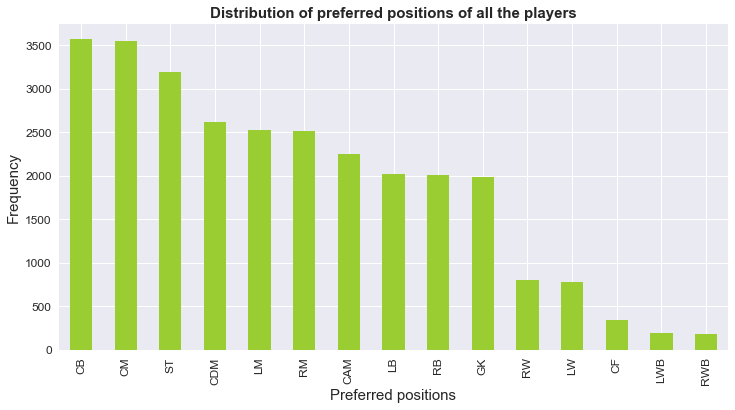

In [1286]:
plt.figure(figsize=(12,6))
df_pp_count.plot(kind="bar",color='yellowgreen')
plt.title("Distribution of preferred positions of all the players",fontsize=15,fontweight='bold')
plt.xlabel("Preferred positions",fontsize=15)
plt.tick_params(labelsize=12)
plt.ylabel("Frequency",fontsize=15)
plt.show()

###### Inference

The most preferred positions for most of the players is as follows (In the order mentioned): 
Center Back, Center Midfielder, Striker, Center Defensive Midfielder, Left Midfielder, Right Midfielder, Center Attacking Midfielder, Left Back, Right Back, Goal Keeper, Right Wing, Left Wing, Center Forward and so on. 

# Predicting Player's positions (Attack or Defend)

In [1140]:
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1141]:
columns_required = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions']

In [1142]:
columns_required_rearranged = ['Aggression','Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Long shots','Penalties', 'Shot power', 'Volleys', 
       'Short passing', 'Long passing',
       'Interceptions', 'Marking', 'Sliding tackle', 'Standing tackle',
       'Strength', 'Vision', 'Acceleration', 'Agility', 
       'Reactions', 'Stamina', 'Balance', 'Ball control','Composure','Jumping', 
       'Sprint speed', 'Positioning','Preferred Positions']

In [1143]:
df_new = df[columns_required_rearranged]
df_new.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST LW
1,48,77,89,97,95,90,71,88,74,85,...,90,95,73,95,95,96,68,87,93,RW
2,56,75,81,96,89,84,62,77,81,80,...,96,88,78,82,95,92,61,90,90,LW
3,78,77,86,86,94,84,77,86,85,87,...,86,93,89,60,91,83,69,77,92,ST
4,29,15,14,30,13,11,25,16,47,25,...,52,85,44,35,48,70,78,61,12,GK


In [1145]:
# We do not want to predict Goal Keeper as it does not make sense because it would be too obvious
df_new['Preferred Positions'] = df_new['Preferred Positions'].str.strip()
df_new = df_new[df_new['Preferred Positions']!='GK']

In [1146]:
df_new.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,63,85,81,91,94,76,88,92,85,94,...,89,96,92,63,93,95,95,91,95,ST LW
1,48,77,89,97,95,90,71,88,74,85,...,90,95,73,95,95,96,68,87,93,RW
2,56,75,81,96,89,84,62,77,81,80,...,96,88,78,82,95,92,61,90,90,LW
3,78,77,86,86,94,84,77,86,85,87,...,86,93,89,60,91,83,69,77,92,ST
5,80,62,77,85,91,84,85,83,81,88,...,78,91,79,80,89,87,84,83,91,ST


In [1147]:
df_new.isnull().values.any()

False

In [1148]:
unique_pp = list(set([x[0] for x in df['Preferred Positions'].str.split()]))
unique_pp

['RM',
 'ST',
 'LW',
 'CB',
 'LWB',
 'LB',
 'LM',
 'CAM',
 'RWB',
 'CM',
 'RW',
 'GK',
 'CDM',
 'RB',
 'CF']

##### Handle players with multiple preferred_positions: duplicate a set of data for each###### 

In [1149]:
#copy the dataframe into a new dataframe
df_copy = df_new.copy()
df_copy.drop(df_copy.index, inplace=True)

for i in unique_pp:
    df_temp = df_new[df_new['Preferred Positions'].str.contains(i)]
    df_temp['Preferred Positions'] = i
    df_copy = df_copy.append(df_temp, ignore_index=True)

/Users/ashishpowani/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1150]:
#df_copy.iloc[::500,:]

In [1151]:
cols = [x for x in df_copy.columns if x not in ['Preferred Positions']]
cols

['Aggression',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'Heading accuracy',
 'Long shots',
 'Penalties',
 'Shot power',
 'Volleys',
 'Short passing',
 'Long passing',
 'Interceptions',
 'Marking',
 'Sliding tackle',
 'Standing tackle',
 'Strength',
 'Vision',
 'Acceleration',
 'Agility',
 'Reactions',
 'Stamina',
 'Balance',
 'Ball control',
 'Composure',
 'Jumping',
 'Sprint speed',
 'Positioning']

In [1152]:
for i in cols:
    df_copy[i] = [eval(x) if isinstance(x,str) else x for x in df_copy[i]]

In [1153]:
#df_copy.iloc[::500,:]
df_copy.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,68,90,83,85,83,83,53,86,77,85,...,80,88,87,75,87,84,65,75,84,RM
1,80,80,78,90,85,78,70,82,77,84,...,90,87,85,87,87,86,85,84,86,RM
2,47,80,87,92,85,81,51,88,80,87,...,89,87,68,91,89,86,61,86,85,RM
3,44,86,85,84,76,87,52,84,67,80,...,78,83,90,82,87,87,57,74,81,RM
4,65,88,87,83,82,86,62,91,81,86,...,82,84,68,75,85,87,54,75,80,RM


### Normalization

In [1154]:
df_copy_normalized = df_copy.iloc[:,:-1].div(df_copy.iloc[:,:-1].sum(axis=1), axis=0)
df_copy_normalized.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Acceleration,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning
0,0.031050,0.041096,0.037900,0.038813,0.037900,0.037900,0.024201,0.039269,0.035160,0.038813,...,0.034703,0.036530,0.040183,0.039726,0.034247,0.039726,0.038356,0.029680,0.034247,0.038356
1,0.036248,0.036248,0.035342,0.040779,0.038514,0.035342,0.031717,0.037155,0.034889,0.038061,...,0.039873,0.040779,0.039420,0.038514,0.039420,0.039420,0.038967,0.038514,0.038061,0.038967
2,0.022191,0.037771,0.041076,0.043437,0.040132,0.038244,0.024079,0.041549,0.037771,0.041076,...,0.041076,0.042021,0.041076,0.032106,0.042965,0.042021,0.040604,0.028801,0.040604,0.040132
3,0.020873,0.040797,0.040323,0.039848,0.036053,0.041271,0.024668,0.039848,0.031784,0.037951,...,0.036528,0.037002,0.039374,0.042694,0.038899,0.041271,0.041271,0.027040,0.035104,0.038425
4,0.030360,0.041102,0.040635,0.038767,0.038300,0.040168,0.028958,0.042504,0.037833,0.040168,...,0.035965,0.038300,0.039234,0.031761,0.035030,0.039701,0.040635,0.025222,0.035030,0.037366


In [1155]:
mapping = {'ST': 1, 'RW': 1, 'LW': 1, 'RM': 1, 'CM': 1, 'LM': 1, 'CAM': 1, 'CF': 1, 'CDM': 0, 'CB': 0, 'LB': 0, 'RB': 0, 'RWB': 0, 'LWB': 0}
mapping

{'CAM': 1,
 'CB': 0,
 'CDM': 0,
 'CF': 1,
 'CM': 1,
 'LB': 0,
 'LM': 1,
 'LW': 1,
 'LWB': 0,
 'RB': 0,
 'RM': 1,
 'RW': 1,
 'RWB': 0,
 'ST': 1}

In [1156]:
df_copy_normalized['Preferred Positions'] = df_copy['Preferred Positions']

In [1157]:
df_copy_normalized = df_copy_normalized.replace({'Preferred Positions': mapping})
#df_copy_normalized.iloc[::1000,]
df_copy.head()

,Aggression,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Heading accuracy,Long shots,Penalties,Shot power,...,Agility,Reactions,Stamina,Balance,Ball control,Composure,Jumping,Sprint speed,Positioning,Preferred Positions
0,68,90,83,85,83,83,53,86,77,85,...,80,88,87,75,87,84,65,75,84,RM
1,80,80,78,90,85,78,70,82,77,84,...,90,87,85,87,87,86,85,84,86,RM
2,47,80,87,92,85,81,51,88,80,87,...,89,87,68,91,89,86,61,86,85,RM
3,44,86,85,84,76,87,52,84,67,80,...,78,83,90,82,87,87,57,74,81,RM
4,65,88,87,83,82,86,62,91,81,86,...,82,84,68,75,85,87,54,75,80,RM


### Split the data set into two: - Train and Test data

In [1158]:
X_train, X_test, y_train, y_test = train_test_split(df_copy_normalized.iloc[:,:-1], df_copy_normalized.iloc[:,-1], random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('y train shape: {}'.format(y_train.shape))
print('y test shape: {}'.format(y_test.shape))

X train shape: (20438, 29)
X test shape: (6813, 29)
y train shape: (20438,)
y test shape: (6813,)


### Building classification models

### Logistic Regression

In [1159]:
#Dummy Classifier
clf_D = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
#Accuracy
acc_D = clf_D.score(X_test, y_test)
print ('Dummy Classifier (most frequent class): {}'.format(acc_D))

#Logistic Regression Classifier
clf_LR = LogisticRegression().fit(X_train, y_train)
#Accuracy
acc_LR = clf_LR.score(X_test, y_test)
print ('Logistic Regression Accuracy: {}'.format(acc_LR))

# Predict the target variable
y_pred = clf_LR.predict(X_test)

Dummy Classifier (most frequent class): 0.6029649200058711
Logistic Regression Accuracy: 0.8488184353441949


In [1160]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.858


In [1161]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2111  594]
 [ 436 3672]]


In [1162]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.78      0.80      2705
          1       0.86      0.89      0.88      4108

avg / total       0.85      0.85      0.85      6813



### Random Forest

In [1163]:
#Classifier
clf_RF = RandomForestClassifier(random_state=0).fit(X_train, y_train)
#Accuracy
acc_RF = clf_RF.score(X_test, y_test)
print ('Random Forest Accuracy (Default parameters): {}'.format(acc_RF))

# Predict the target variable
y_pred_RF = clf_RF.predict(X_test)

Random Forest Accuracy (Default parameters): 0.7858505797739616


In [1164]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

[[1993  712]
 [ 747 3361]]


### Neural Network

In [1165]:
clf_nn = MLPClassifier(random_state=0).fit(X_train, y_train)
acc_nn = clf_nn.score(X_test, y_test)
print ('Neural Networks Accuracy (Default parameters): {}'.format(acc_nn))

Neural Networks Accuracy (Default parameters): 0.8586525759577279


In [1166]:
# Predict the target variable
y_pred_NN = clf_nn.predict(X_test)

In [1167]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_NN)
print(confusion_matrix)

[[2236  469]
 [ 494 3614]]


### Conclusion

### Future Scope of the project